# Guía de ejercicios 1

Recomiendo hacer, además de estos, los ejercicios de los capítulos 1 a 3 del libro [Bayes Rules!](https://www.bayesrulesbook.com/).


In [1]:
# paquetes
from scipy.stats import beta
import numpy  as np
from numpy.random import binomial
import  matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

a = beta(5,15).rvs(size=5)
print(a)

[0.28017158 0.19471911 0.25604015 0.3795209  0.24823976]


## Ejercicio 1

Supongamos que queremos averiguar cuál es la superficie de la Tierra cubierta por agua, $\theta$. Para eso, lanzamos al aire un globo terráqueo y al atraparlo, registramos si nuestro dedo índice de la mano derecha quedó marcando agua o tierra. De esta manera obtenemos una secuencia de muestras aleatorias de una variable $Bernoulli(\theta)$ independientes.

1. Con ese procedimiento se obtienen 4 "agua" (**A**) y 11 "tierra" (**T**). Usando un prior uniforme para $\theta$, obtener la distribución posterior para $\theta$.

    Rta: como el prior es una Uniforme podemos decir que $P(\theta) = U(0,1) = Beta(1,1)$ de acá y sabiendo que observamos 4 A (evento con probabilidad $\theta$ de ocurrir) y 11 T (evento con probabilidad $(1 - \theta)$ de ocurrir). El
        likelihood $L(\theta) = \underbrace{\theta \times \ldots \times \theta}_{4 A} \times \underbrace{(1 - \theta) \times \ldots \times (1 - \theta)}_{11 T} = \theta^4 \times (1 - \theta)^{11} = Beta(3, 10)$.

    De acá podemos ver que si obervamos $y$ (4 A y 5 T) el posterior:
        $ P(\theta | y) \propto L(\theta) P(\theta) = (\theta^4 \times (1 - \theta)^{11}) \times (\theta \times (1 - \theta)) = (\theta^5 \times (1 - \theta)^{12} = Beta(5, 12)$

1. Usando la distribución posterior calculada, obtener la distribución "posterior predictive" para las siguientes 5 muestras aleatorias.

1. Usar la distribución "posterior predictive" para calcular la probabilidad de obtener 3 o más **A** en las siguientes 5 realizaciones.

In [2]:
#solución ítem 2.
inicial_A = 4
inicial_T = 11

distribucion_theta = beta(inicial_A + 1, inicial_T + 1)

# Podemos obtener una muestra:
a = distribucion_theta.rvs(size=5)
print(f"La posterior predictive nos arroja los siguientes 5 resultados {a}")

La posterior predictive nos arroja los siguientes 5 resultados [0.19803886 0.3342675  0.45715655 0.32728696 0.3445858 ]


In [3]:
#solución ítem 3
cant_experimentos = 10000
thetas = beta(5,15).rvs(size=cant_experimentos)

# realizo cant_experimentos veces una binomial
sample = binomial(5, thetas, len(thetas))

# cálculo la cantidad de veces que obtuve 3 o más A
res = sum([ x>=3 for x in sample])/len(thetas)

print(f"Usando la posterior predictive obtuvimos que la probabilidad de obtere al menos 3 A es {res:5f}")
print("Nota: hacer una única binomial por cada theta es lo mismo que hacer muchas tiradas con cada una. Porque los thetas se empiezan a repetir.")

Usando la posterior predictive obtuvimos que la probabilidad de obtere al menos 3 A es 0.125300
Nota: hacer una única binomial por cada theta es lo mismo que hacer muchas tiradas con cada una. Porque los thetas se empiezan a repetir.


## Ejercicio 2

Siguiente el procedimiento del ejercicio anterior y partiendo de una distribución uniforme, graficar la distribución posterior luego de observar **A**. Luego, usando esa distribución posterior como prior, calcular y graficar la distribución posterior luego de observar **T**. Continuar este proceso para ver cómo se actualiza secuencialmente la distribución posterior cuando sucesivamente obtenemos (después de las dos primeras muestras aleatorias) {**A**, **A**, **A**, **T**, **A**, **T**, **A**}.

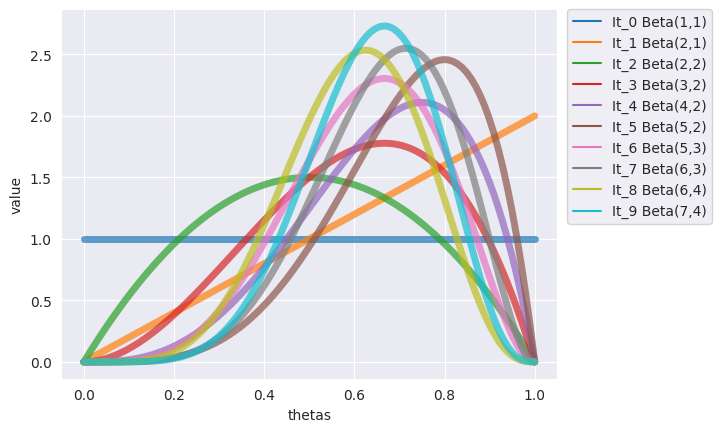

In [4]:
a = 1
b = 1

thetas = np.linspace(0, 1, 100)

exps =  pd.DataFrame({'thetas': thetas,
                   f'It_0 Beta({a},{b})': beta.pdf(thetas, a, b)})

for idx,res in enumerate(["A", "T", "A", "A", "A", "T", "A", "T", "A"]):
    if res == "A":
        a = a + 1
    else:
        b = b + 1

    exps[f'It_{idx+1} Beta({a},{b})'] = beta.pdf(thetas, a, b)

sns.lineplot(x='thetas', y='value', hue='variable',
             data=pd.melt(exps, ['thetas']), linewidth = 5, alpha=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


## Ejercicio 3

Repetir el ejercicio 2 pero partir de un prior triangular, con máximo en $\theta$. Para hacerlo, hacer una aproximación de grilla para calcular la posterior. Esto es:

1. Definir un vector de valores de $\theta$ en los cuales se quiere estimar la posterior.
2. Calcular el prior para cada valor en esa grilla.
3. Calcular la función de likelihood para valor del parámetro.
4. Calcular la posterior no normalizada multiplicando el prior por el likelihood.
5. Normalizar la posterior dividiendo por la suma de todos sus valores.


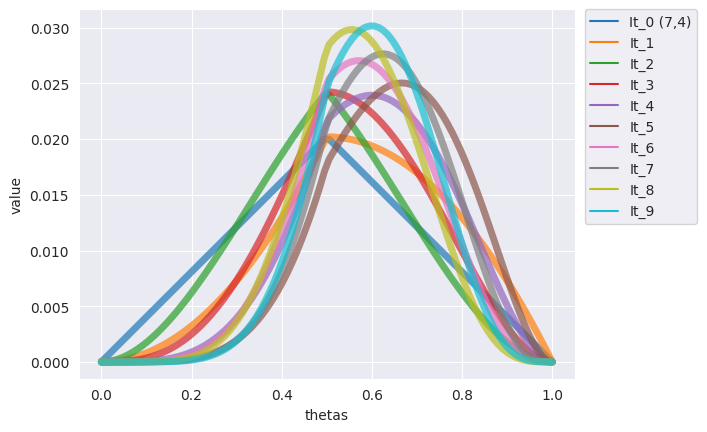

In [5]:
# Defino las probabilidades de un único ensayo (sale A o sale T)
sale_a = np.linspace(0, 1, 100)
sale_t = np.linspace(1, 0, 100)

# para el intervalo 0, 1 calculo las probabilidades de theta
vals = np.linspace(0, 1, 100)
probs_theta = [(y if y < 0.5 else 1-y) * 4  for y in vals] #multiplico por 4 para que sea una prob
probs_tita_norm = [ y/sum(probs_theta) for y in probs_theta]

exps =  pd.DataFrame({'thetas': vals,
                   f'It_0 ({a},{b})': probs_tita_norm})


for idx,res in enumerate(["A", "T", "A", "A", "A", "T", "A", "T", "A"]):
# for idx,res in enumerate(["A" for _ in range(10)]):
    if res == "A":
        probs_theta = np.multiply(probs_theta, sale_a)
    else:
        probs_theta = np.multiply(probs_theta, sale_t)

    probs_tita_norm = [ y/sum(probs_theta) for y in probs_theta]

    exps[f'It_{idx+1}'] = probs_tita_norm


sns.lineplot(x='thetas', y='value', hue='variable',
             data=pd.melt(exps, ['thetas']), linewidth = 5, alpha=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Ejercicio 4

Crear una función que genere N datos del proceso aleatorio descripto en el ejercicio 1 tomando como parámetros y $\theta$. Crear otra función que calcule la distribución posterior partiendo de un prior uniforme, genere muestras de esta distribución y con esas muestras devuelva un intervalo de credibilidad del 50%. Con esta función, estimar el número mínimo de muestras aleatorias que se necesitan para estimar $\theta$ con un intervalo de credibilidad de ancho menor a 0.1.

## Ejercicio 5

Supongamos que estamos de espaldas a una mesa de pool separada en dos por una línea vertical. Juan y Alicia participan del siguiente juego. Tiran una pelota a la mesa que cae en un punto cualquiera, al azar. Si cae a la izquierda de la línea, Alicia gana 1 punto. Si cae a la derecha, Juan gana 1 punto. Gana el primero que llega a 6 puntos. Después de tirar 8 bolas, Alicia suma 5 puntos y Juan 3.

   1. Calcular la distribución posterior para la probabilidad $\theta$ de que Juan gane el juego.
   1. Tomar muestras de la posterior y con ellas obtener la esperanza de $\theta$. Comparar con el resultado visto en clase.
   1. Simular este juego para obtener la probabilidad esperada de que gana Juan el juego, entendida como la cantidad de veces que gana Juan el juego condicional a que va perdiendo 5 a 3.